# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> João Guilherme Coelho Apparecido</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
df['Hemisfério']='none'

In [6]:
def classificao(df):
    if df.Latitude<0:
        return 'Sul'
    else:
        return 'Norte'
    return l1

df['Hemisfério']=df.apply(classificao,axis=1)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [7]:
df.Magnitude.describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

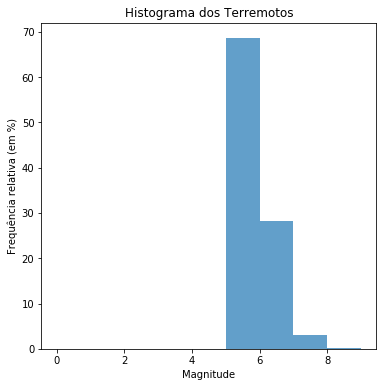

In [8]:
faixa = range(0,10,1)
Mag_cat = pd.cut(df.Magnitude, bins=faixa)
Mag_cat.value_counts(sort=False, normalize=True)*100

from numpy import zeros_like
plot = df.Magnitude.plot.hist(bins=faixa,title='Histograma dos Terremotos', weights=zeros_like(df.Magnitude)+1./df.Magnitude.size*100, figsize=(6, 6), alpha=0.7)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Magnitude')

O Histograma da magnitude da base de dados indica que há uma predominância na ocorrência de abalos de magnitude no valor de 5.5 MW, sendo que não há valores menores que 5.5 MW e que conforme o valor do abalo aumenta, a frequência diminui

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [9]:
#definindo a média, lambda e o sigma
mu=df['Magnitude'].mean()
lamb=1/mu
sigma=1/lamb
n=1000

#definindo scale
scale=mu
loc=0

#Gerar n dados:
X = expon.rvs(loc,scale,n)





Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

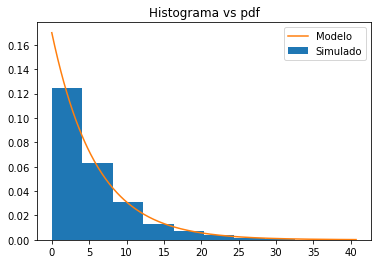

In [10]:


#Histograma vs pdf
plt.hist(X, normed = True)
x = np.arange(X.min(),X.max(), 0.1)
plt.plot(x, expon.pdf(x, loc, scale))
plt.title('Histograma vs pdf')
plt.legend(['Modelo', 'Simulado'])

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [11]:
tabela=pd.crosstab(df.Hemisfério, df.Type,normalize=True)
tabela

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447164,0.000085,0.006279,0.000000
Sul,0.545148,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

Resposta: A probabilidade de ocorrer um terremoto no hemisfério Norte é, aproximadamente, 44,7%. Tal resultado foi possível através da crosstab entre a porcentagem de certos eventos no hemisfério norte e sul. A partir do cruzamento dos eventos ocorridos no hemisfério Norte e o evento ser um terremoto, a probabilidade será 44,7%

Explique o seu raciocínio

Para 100% dos eventos, 44% corresponde a terremotos no hemisfério norte, portanto pode-se dizer que a probabilidade de ocorrer terremotos no Norte é 44%

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [12]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=6)

probabilidadesnorte=pd.crosstab(df.Hemisfério,df.Type,margins=True).apply(percConvert, axis=1)
probabilidadesnorte

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,98.596723,0.018836,1.384442,0.000000,100.0
Sul,99.757699,0.015632,0.218853,0.007816,100.0
All,99.231164,0.017085,0.747480,0.004271,100.0


Resposta: A probabilidade de ter sido uma explosão nuclear é de aproximadamente 1,38%, uma vez que se tomamos apenas os eventos no hemisfério Norte como nosso espaço amostral, tal probabilidade representa a chance de ser uma explosão nuclear.

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

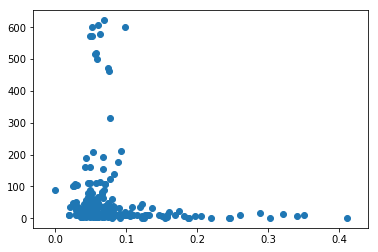

In [13]:
plt.scatter(df['Magnitude Error'],df['Depth'])
plt.show()


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [19]:
dflimpo=df.dropna(subset=['Magnitude Error','Depth'])
print("Correlação entre Magnitude Error e Depth:",np.corrcoef(dflimpo['Magnitude Error'],dflimpo['Depth'])[0,1])

Correlação entre Magnitude Error e Depth: -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


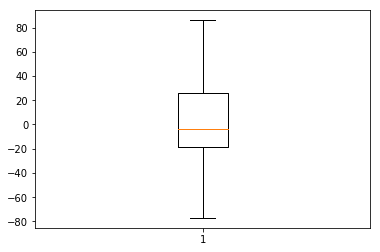

 A caixinha representa os valores que estão entre 25% e 75% dos dados.Isso significa que quanto maior essa caixinha, maior será a dispersão dos dados.A linha laranja representa a mediana, que representa o pico da curva. Como ela está mais abaixo do retângulo, isso significa que o há um assimetria a direita


In [15]:
print(df.Latitude.describe())
plt.boxplot(df.Latitude)
plt.show()
            
            


print(" A caixinha representa os valores que estão entre 25% e 75% dos dados.Isso significa que quanto maior essa caixinha, maior será a dispersão dos dados.A linha laranja representa a mediana, que representa o pico da curva. Como ela está mais abaixo do retângulo, isso significa que o há um assimetria a direita")
      

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


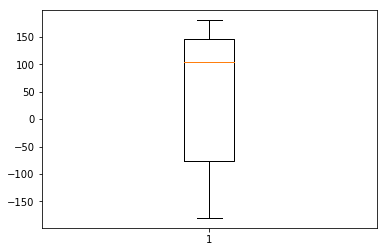

A caixinha representa os valores que estão entre 25% e 75% dos dados.Isso significa que quanto maior essa caixinha, maior será a dispersão dos dados.Nesse caso a caixinha está com um tamanho relativamente grande, indicando uma grande dispersão de dados.A linha laranja representa a mediana, que representa o pico da curva. Como ela está mais acima do retângulo, isso significa que há um assimetria a esquerda


In [16]:
print(df.Longitude.describe())
plt.boxplot(df.Longitude)
plt.show()

print("A caixinha representa os valores que estão entre 25% e 75% dos dados.Isso significa que quanto maior essa caixinha, maior será a dispersão dos dados.Nesse caso a caixinha está com um tamanho relativamente grande, indicando uma grande dispersão de dados.A linha laranja representa a mediana, que representa o pico da curva. Como ela está mais acima do retângulo, isso significa que há um assimetria a esquerda")

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [17]:
probabilidades=pd.crosstab([df.Hemisfério,df['Magnitude Type']],df.Type,normalize=True)
probabilidades

Type                       Earthquake  Explosion  Nuclear Explosion  \
Hemisfério Magnitude Type                                             
Norte      MB                0.066086   0.000085           0.005767   
           MD                0.000256   0.000000           0.000000   
           MH                0.000214   0.000000           0.000000   
           ML                0.002777   0.000000           0.000513   
           MS                0.032765   0.000000           0.000000   
           MW                0.157375   0.000000           0.000000   
           MWB               0.047503   0.000000           0.000000   
           MWC               0.102055   0.000000           0.000000   
           MWR               0.000513   0.000000           0.000000   
           MWW               0.037550   0.000000           0.000000   
Sul        MB                0.087445   0.000085           0.001196   
           MS                0.039942   0.000000           0.000000   
           MW                0.172498   0.000000           0.000000   
           MWB               0.057499   0.000000           0.000000   
           MWC               0.140074   0.000000           0.000000   
           MWR               0.000598   0.000000           0.000000   
           MWW               0.047161   0.000000           0.000000   

Type                       Rock Burst  
Hemisfério Magnitude Type              
Norte      MB                0.000000  
           MD                0.000000  
           MH                0.000000  
           ML                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.000000  
           MWR               0.000000  
           MWW               0.000000  
Sul        MB                0.000000  
           MS                0.000000  
           MW                0.000000  
           MWB               0.000000  
           MWC               0.000043  
           MWR               0.000000  
           MWW               0.000000

Norte, uma que se fizermos uma crosstab entre esses três elementos (Magnitude Type, Hemisfério e Type), observaremos a porcentagem de cada evento de acordo com cada hemisfério e tipo de Magnitude. Na tabela acima,dentro de todas as possibilidades possíveis, observamos que a chance de ocorrer um NB no hemisfério Norte é de 0,576%, enquanto que no hemisfério Sul é de 0,119%